In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Group By Drug Regimen
drug_column = mouse_study_df.groupby('Drug Regimen')

#Obtain the List of Drug Regimens
drug_sort = mouse_study_df['Drug Regimen'].sort_values()
drug_list = drug_sort.unique()

#Create the Mean List
tumor_vol_mean_list = drug_column['Tumor Volume (mm3)'].mean().unique()

#Create the Median List
tumor_vol_median_list = drug_column['Tumor Volume (mm3)'].median().unique()

#Create the Variance List
tumor_vol_variance_list = drug_column['Tumor Volume (mm3)'].var().unique()
    
#Create the St. Dev. List
tumor_vol_std_list = drug_column['Tumor Volume (mm3)'].std().unique()
    
#Fill the SEM List
tumor_vol_sem_list = drug_column['Tumor Volume (mm3)'].sem().unique()


#Create the DataFrame
summary_df = pd.DataFrame({'Mean Volume':tumor_vol_mean_list, 'Median Volume':tumor_vol_median_list, 'Variance in Volume':tumor_vol_variance_list, 'St. Dev. of Volume':tumor_vol_std_list, 'SEM of Volume':tumor_vol_sem_list}, index = drug_list)
#Map to Round the Decimal Points
#summary_df['Mean Volume'] = summary_df['Mean Volume'].map('{:.2f}')
#summary_df['Median Volume'] = summary_df['Median Volume'].map('{:.2f}')
#summary_df['Variance in Volume'] = summary_df['Variance in Volume'].map('{:.2f}')
#summary_df['St. Dev. of Volume'] = summary_df['St. Dev. of Volume'].map('{:.2f}')
#summary_df['SEM of Volume'] = summary_df['SEM of Volume'].map('{:.2f}')
#Print the DataFrame
summary_df

,Mean Volume,Median Volume,Variance in Volume,St. Dev. of Volume,SEM of Volume
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


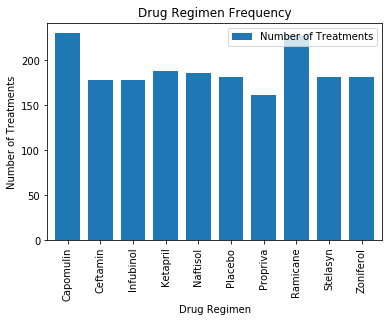

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#Obtain the List of Drug Regimens
drug_column = mouse_study_df['Drug Regimen'].sort_values()
drug_list = drug_column.unique().astype(str)

#Obtain the List of Treatment Data Points
treatment_df = mouse_study_df.groupby('Drug Regimen')
treatment_count = treatment_df['Timepoint'].count()

#Create DataFrame for Columns
drug_df = pd.DataFrame({'Drug Regimen':drug_list, 'Number of Treatments':treatment_count})

#Create the Bar Chart
bar = drug_df.plot(kind = "bar", figsize=(6,4), width=0.75)
#Create the Title and Axis Labels
#Label Syntax found on https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot
bar.set_title("Drug Regimen Frequency")
bar.set_xlabel("Drug Regimen")
bar.set_ylabel("Number of Treatments")
#Show the Bar Chart
bar

<BarContainer object of 10 artists>

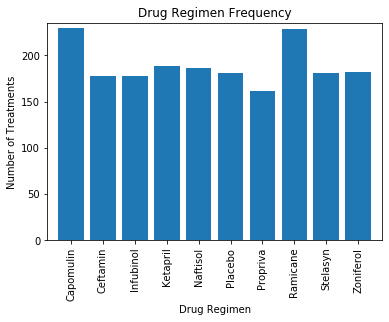

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Determine Criteria for the Bar Chart
#Syntax found on MatPlotLib Day 2 Plot_Drills
#Set the Length of the x-Axis
x_axis = np.arange(0, len(drug_list))
#Set the Tick Locations
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

#Create the Title and Axis Labels
title = plt.title('Drug Regimen Frequency')
xlabel = plt.xlabel('Drug Regimen')
ylabel = plt.ylabel('Number of Treatments')

#Set the x and y Axis Limits
plt.xlim(-0.75, len(drug_list)-.25)
plt.ylim(0, max(treatment_count) + 5)

#Create the Bar Chart
bar1 = plt.bar(drug_df['Drug Regimen'], drug_df['Number of Treatments'])
#Create the Ticks
plt.xticks(tick_locations, drug_list, rotation = 90)
#Show the Bar Chart
bar1

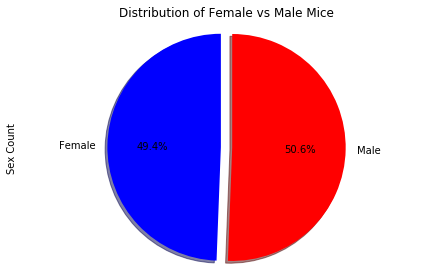

Sex
Female    935
Male      958
Name: Sex, dtype: int64

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Create a List of Sexes
sex_column = mouse_study_df['Sex'].sort_values()
sex_list = sex_column.unique().astype(str)

#Create a Count of Sexes
sex_type_df = mouse_study_df.groupby('Sex')
sex_count = sex_type_df['Sex'].count()

#Create a DataFrame with Sex Data
sex_df = pd.DataFrame({'Sex':sex_list, 'Sex Count':sex_count})
sex_df

#Create a Pie Chart of Sex Distribution
#Syntax and Arguments found on MatPlotLib Day 1 Activity 9: Pie Charts
#Used Single Column Array Instead of Whole DataFrame in Order to Produce Plot
#Credit to Don Caswell
pie = sex_count.plot.pie(labels = sex_list, title = ('Distribution of Female vs Male Mice'), colors = ["blue", "red"], explode = [0.1,0], autopct="%1.1f%%", shadow=True, startangle=90)
pie.set_ylabel('Sex Count')
#Set the Size of the Layout
plt.tight_layout()
#Ensure the Pie Chart is Perfectly Rounded
plt.axis("equal")
#Show the Plot
plt.show()
sex_count

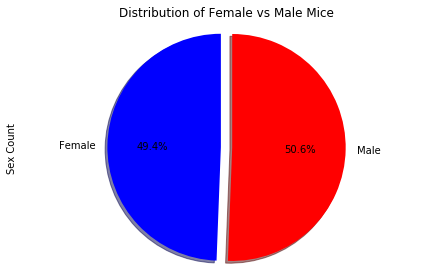

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Create the Title and Axis Labels
title1 = plt.title('Distribution of Female vs Male Mice')
ylabel1 = plt.ylabel('Sex Count')

#Create the Pie Chart
#Syntax and Arguments found on MatPlotLib Day 1 Activity 9: Pie Charts
#Used Single Column Array Instead of Whole DataFrame in Order to Produce Plot
#Credit to Don Caswell
pie1 = plt.pie(sex_count, labels = sex_list, colors = ["blue", "red"], explode = [0.1,0], autopct="%1.1f%%", shadow=True, startangle=90)
pie.set_ylabel('Sex Count')
#Set the Size of the Layout
plt.tight_layout()
#Ensure the Pie Chart is Perfectly Rounded
plt.axis("equal")
#Show the Plot
plt.show()

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.


In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen  